목차
===
**-Analysis-**  
--
**1. 새로운 데이터셋 만들기**  
1) 사건 테이블  
2) 사람 테이블  

**2. YZ세대의 주식시장 진입동기**  
 저금리 기조 유지  
 주택매매가격 상승  
 코로나19로 인한 주가하락

**3. YZ세대 vs 이전세대 비교분석**  -코로나19 전 후 비교  
 투자성향  
 주문 매체 유형  
 간접투자 / 직접투자   
 테마주   
 주문시간대  

**4. 군집화 및 군집별 비교분석**  
1) pca 차원축소 + k-means 군집화  
2) 군집별 비교분석    
*   1인당 개설 계좌 수
*   간접투자 / 직접투자
*   테마주
*   중대형주 / 소형주 / 거래대금
*   1일 회전율

**-Insight-**  
--
**[YZ세대, 같지만 너무도 다른 그들]**

1) 이전세대와 비교한 YZ세대의 특징  
2) YZ세대 내 군집별 특징  

**-Suggestion-**  
--
**[획일적인 서비스? NO! 맞춤형 서비스? YES!]**

1) 군집 B - 장기적인 선구안을 그대에게👀   
2) 군집 D - 빛보다 빠른 정보들을 그대에게🚀

---
---






**-Analysis-**
--

**1. 새로운 데이터셋 만들기**
--

라이브러리 설치
---

In [1]:
# 라이브러리 설치
import pandas as pd
import numpy as np
import os
import datetime
import warnings

warnings.filterwarnings(action='ignore')

os.chdir('C:\\Users\\icear\\Desktop\\새 폴더\\NH투자증권 공모전') 

#시각화
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

#군집화
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans 

데이터 불러오기


In [2]:
# 데이터 불러오기
cus_info = pd.read_csv('2_cus_info.csv')
act_info = pd.read_csv('2_act_info.csv')
iem_info = pd.read_csv('2_iem_info.csv')
trd_kr = pd.read_csv('2_trd_kr.csv')
trd_oss = pd.read_csv('2_trd_oss.csv')
people = pd.read_csv('cus_id_all.csv') # 여러 변수를 생성해서 사람별로 넣음
event = pd.read_csv('trd_all.csv') # 여러 변수를 생성해서 거래별로 넣음
kospi = pd.read_csv('주가(코스피).csv')
기준금리 = pd.read_csv('기준금리.csv')
주택매매가격 = pd.read_csv('주택매매가격.csv' , encoding = 'euc-kr')

거래대금 변수 추가

In [3]:
#사건테이블
data = event
data2 = data[['cus_id', 'act_id', 'cns_qty', 'orr_pr']].drop_duplicates()
data2['거래대금'] = data2['cns_qty'] * data2['orr_pr']
people2 = data2['거래대금'].groupby(data2['cus_id'])
people3 = pd.DataFrame(people2.sum()).reset_index()

간접투자:0 / 직접투자:1 변수 추가

**2. YZ세대의 주식시장 진입동기**
--


*   최근 ***주식시장에 진입한 YZ세대가 급증***하고 있다.  
한국금융투자협회에 따르면 올해 1분기 20∼30대 연령층의 주식계좌가 지난해 같은 기간보다 50% 이상 급증했다.   
NH투자증권도 올해 상반기(1~5월)에 신설된 계좌의 69.3%가 20대와 30대 소유인 것으로 집계됐다고 밝혔다.  

*   또한 <u>증시대기자금이 상승추세</u>에 있고 <u>개인 투자자들의 수익률도 준수한 편</u>이어서, ***YZ세대의 주식투자는 한동안 지속될 것***으로 보인다.
*   따라서 **<u>YZ세대의 주식시장 진입동기 및 투자특징 분석</u>**을 통해, 향후 NH투자증권의 지향점을 설정할 수 있을 것이다.



저금리 기조 유지
---

In [5]:
# 데이터 부분
# 기준금리 전처리
for i in range(len(기준금리['date'])):
    기준금리['date'][i]=int(기준금리['date'][i].replace('-', ''))
기준금리_cut = 기준금리[(기준금리['date']>=20190101) & (기준금리['date']<20200701)]
기준금리_cut['기준금리'] = 기준금리_cut['기준금리'].astype('str')

# 2019년 1월부터 2020년 6월 30일까지 yz세대 매수
a = event[(event['YZ세대여부']==1) & (event['sby_dit_cd']==2)]['orr_dt'].value_counts().to_frame().reset_index().rename(columns={
    'index' : 'date' ,
    'orr_dt' : '매수개수'
}).sort_values('date')

# 기준금리와 yz세대 매수 merge
기준금리_a = pd.merge(a, 기준금리_cut)




# 시각화 부분
subfig = make_subplots(specs=[[{'secondary_y': True}]]) # 이중축 subplot생성

f=(px.line(기준금리_a,x='date',y='매수개수' ))
f.update_traces( showlegend=True,name='매수량') 

f2 = px.line(기준금리_a,x='date',y='기준금리')
f2.update_traces(yaxis='y2',
                 line=dict(color='firebrick'))
f2.update_traces(showlegend=True,name='기준금리') 

subfig.add_traces(f.data + f2.data)

# 레이아웃 수정
subfig.update_layout(
    title='기준금리에 따른 주식매수량(YZ세대)',
    paper_bgcolor='white', 
    plot_bgcolor='white',
    xaxis_tickfont_size=14,
    xaxis=dict(
        title='date'), # x축 설정
    xaxis_type='category',
    yaxis=dict(
        title='주식매수량',
        titlefont_size=16,
        tickfont_size=14,), # 첫번째(왼쪽)y축 설정
    yaxis2=dict(
        title='기준금리',
        titlefont=dict(
            color='firebrick'),
        tickfont=dict(
            color='firebrick')
        ))  # 두번째(오른쪽)y축 수정

subfig.show()


>**결과** : **<u>기준금리가 연속적으로 하락</u>**함에 따라 **<u>주식 매수량 또한 증가</u>**하고 있는 모습을 보인다.

주택매매가격 상승
---

In [6]:
# 데이터 부분
# 주택매매가격을 2020년 7월 이전으로 추출
주택매매가격_cut = 주택매매가격[주택매매가격['날짜']<'2020-07']
주택매매가격_cut2 = 주택매매가격_cut.melt('날짜').rename(columns={
    'variable' : '분류' ,'value' : '주택매매가격' ,'날짜' : 'date'
})

# yz세대 날짜별 매수를 월단위로 합침
a = event[(event['YZ세대여부']==1) & (event['sby_dit_cd']==2)]['orr_dt'].value_counts().to_frame().reset_index().rename(columns={
    'index' : 'date' ,
    'orr_dt' : '매수개수'
}).sort_values('date')

a['date'] = pd.to_datetime(a['date'], format='%Y%m%d', errors='coerce')
a = a.resample('MS' , on='date').sum().reset_index()
a['date'] = a['date'].astype('str')



# 시각화 부분
subfig = make_subplots(specs=[[{'secondary_y': True}]]) # 이중축 subplot생성

f=(px.line(a,x='date',y='매수개수' ))
f.update_traces( showlegend=True,name='매수량' ,mode='lines+markers') 

f2 = px.line(주택매매가격_cut2,x='date',y='주택매매가격' ,color='분류',
            color_discrete_sequence=px.colors.qualitative.Set2)
f2.update_traces(yaxis='y2')
f2.update_traces(showlegend=True) 

subfig.add_traces(f.data + f2.data) 

# 레이아웃 수정
subfig.update_layout(
    title='주택매매가격에 따른 주식매수량(YZ세대)',
    paper_bgcolor='white', 
    plot_bgcolor='white',
    xaxis_tickfont_size=14,
    xaxis=dict(
        title='date'), # x축 설정
    xaxis_type='category',
    yaxis=dict(
        title='주식매수량',
        titlefont_size=16,
        tickfont_size=14,), # 첫번째(왼쪽)y축 설정
    yaxis2=dict(
        title='주택매매가격'
        ))  # 두번째(오른쪽)y축 수정

subfig.show()

>**결과** : **<u>주택매매가격이 점차 상승함</u>**에 따라 **<u>주식매수량 또한 증가</u>**하고 있는 모습을 보인다.

코로나19로 인한 주가 하락
---

코스피 데이터 불러오기

In [7]:
kospi = pd.read_csv('주가(코스피).csv')

데이터 부분

In [8]:
# 데이터 부분

# 날짜를 연/월로 분리
cus_id_all_merge_act = pd.merge(people,act_info)

cus_id_all_merge_act['act_opn_ym'] = pd.to_datetime(cus_id_all_merge_act['act_opn_ym'], format='%Y%m', errors='coerce')
cus_id_all_merge_act.dropna(subset=['act_opn_ym'], inplace = True)

cus_id_all_merge_act['year'] = cus_id_all_merge_act['act_opn_ym'].dt.year.astype('int')
cus_id_all_merge_act['month'] = cus_id_all_merge_act['act_opn_ym'].dt.month.astype('int')

# 코스피를 연/월로 분리
kospi['Date'] = pd.to_datetime(kospi['Date'], format='%Y-%m', errors='coerce')
kospi['year'] = kospi['Date'].dt.year.astype('int')
kospi['month'] = kospi['Date'].dt.month.astype('int')

# YZ세대의 2020년 개설개좌의 개수
a=cus_id_all_merge_act[cus_id_all_merge_act['year']==2020].groupby(['month'])['YZ세대여부'].value_counts().to_frame().rename(
    columns= {'YZ세대여부' : '개설계좌개수'}).reset_index()

# YZ세대 여부를 좀 더 알아보기 쉽게 하기 위해서 텍스트로 바꿈
a.loc[(a['YZ세대여부']==1), 'YZ세대여부']='YZ세대'
a.loc[(a['YZ세대여부']==0), 'YZ세대여부']='YZ이외세대'  

시각화 부분

In [9]:
# 시각화 부분
subfig = make_subplots(specs=[[{'secondary_y': True}]]) # 이중축 subplot생성

f=(px.bar(a,x='month',y='개설계좌개수', 
         color='YZ세대여부', 
         barmode='group',
        text='개설계좌개수',
         labels={"YZ세대여부": "YZ세대여부"},
          color_discrete_sequence=px.colors.qualitative.Set2
         ))
f.update_traces(texttemplate='%{text:.2s}', textposition='outside') # 월별 계좌 개설수 막대그래프

f2 = px.line(kospi[kospi['year']==2020],x='month',y='Adj Close')
f2.update_traces(yaxis='y2', 
                 mode='lines+markers',
                 line=dict(color='firebrick'))
f2.update_traces(showlegend=True,name='코스피지수') # 코스피지수 꺽은선 그래프

subfig.add_traces(f.data + f2.data) # 막대그래프와 꺽은선 그래프 합침

# 레이아웃 수정
subfig.update_layout(
    title='2020년 월별 계좌 개설개수',
    paper_bgcolor='white', 
    plot_bgcolor='white',
    xaxis_tickfont_size=14,
    xaxis=dict(
        title='month'), # x축 설정
    xaxis_type='category',
    yaxis=dict(
        title='계좌개설개수',
        titlefont_size=16,
        tickfont_size=14,), # 첫번째(왼쪽)y축 설정
    yaxis2=dict(
        title='코스피지수',
        titlefont=dict(
            color='firebrick'),
        tickfont=dict(
            color='firebrick')
        ))  # 두번째(오른쪽)y축 수정

subfig.show()

 > **결과**
- 2020년 3월 주식시장에 진입한 yz세대가 확연히(n%) 많은 것을 알 수 있는데,  
이는 코로나19가 본격화되어 코스피지수가 급락한 시기<sup>[1](#footnote_1)</sup>와 일치한다.   
- 따라서 yz세대의 주식투자를 코로나 전과 후로 나누어 비교해보겠다.

<a name="footnote_1">1</a>:*국내 코로나19 확진자가 급증한 2020년 2월 20일(대구지역 확산) 이후로 설정*  



---



> **결과** : 코로나19 이후 **<u>각 테마주들의 매수량이 증가</u>**했다.  
특히 **<u>테마주3(코로나 수혜주)</u>**의 매수가 확연히 늘어난 것을 알 수 있다.



---



**3. YZ세대 vs 이전세대 비교분석**
--

- 코로나19 전 후로 YZ세대의 주식시장 진입이 크게 증가한 것을 알 수 있었다. 
- 따라서 이를 기준점으로 **YZ세대(before 코로나19) vs YZ세대(after 코로나19) vs YZ이전세대**의 비교분석을 통해, YZ세대만의 투자 특징을 알아보도록 하자.

투자성향
---

데이터 부분

In [10]:
# 데이터 부분
# 같은 투자성향인데 데이터 타입이 달라 하나로 합침
event.loc[(event['ivs_icn_cd']==3),'ivs_icn_cd']='03'
event.loc[(event['ivs_icn_cd']==5),'ivs_icn_cd']='05'
event.loc[(event['ivs_icn_cd']==4),'ivs_icn_cd']='04'
event.loc[(event['ivs_icn_cd']==2),'ivs_icn_cd']='02'
# '-'와 '0'은 의미없는 등급이므로 제거
event['ivs_icn_cd'] = event['ivs_icn_cd'][(event['ivs_icn_cd']!= 0) & (event['ivs_icn_cd']!= '00') & (event['ivs_icn_cd']!= '-')]

# YZ세대의 코로나 이전과 이후의 투자성향
a = event[event['YZ세대여부']==1].groupby(['코로나'])['ivs_icn_cd'].value_counts(normalize=True).to_frame().rename(
    columns={'ivs_icn_cd':'ratio'}).reset_index()

b = a[a['코로나']==0].sort_values(by = 'ivs_icn_cd').reset_index(drop=True) # 코로나 이전
c = a[a['코로나']==1].sort_values(by = 'ivs_icn_cd').reset_index(drop=True) # 코로나 이후

# YZ이전세대 투자성향
d = event[event['YZ세대여부']==0]['ivs_icn_cd'].value_counts(normalize=True).to_frame().rename(
    columns={'ivs_icn_cd':'ratio'}).reset_index()
d = d.sort_values(by = 'index').reset_index(drop=True)

시각화 부분

In [11]:
# 시각화 부분

fig = px.pie(d,
                 values = 'ratio', 
                 names = 'index', 
                 title = 'YZ이전세대 코로나 이후 투자성향 등급 비율', 
                 template = 'seaborn',
                 color_discrete_sequence=px.colors.sequential.Darkmint) 

fig.update_traces(rotation=45, pull=[0,0,0.05,0,0,0.1,0], textinfo="percent+label",sort=False) # pull이 파이조각 떨어뜨리는거
fig.show()

fig = px.pie(b,
                 values = 'ratio', 
                 names = 'ivs_icn_cd', 
                 title = 'YZ세대 코로나 이전 투자성향 등급 비율', 
                 template = 'seaborn',
                 color_discrete_sequence=px.colors.sequential.Darkmint)
fig.update_traces(rotation=45, pull=[0,0,0.05,0,0,0.1,0], textinfo="percent+label",sort=False) # pull이 파이조각 떨어뜨리는거
fig.show()

fig = px.pie(c,
                 values = 'ratio', 
                 names = 'ivs_icn_cd', 
                 title = 'YZ세대 코로나 이후 투자성향 등급 비율', 
                 template = 'seaborn',
                 color_discrete_sequence=px.colors.sequential.Darkmint) 
fig.update_traces(rotation=45, pull=[0,0,0.05,0,0,0.1,0], textinfo="percent+label",sort=False) # pull이 파이조각 떨어뜨리는거
fig.show()





> **결과** : 
YZ세대는 이전세대보다 **<u>안정추구적 투자</u>**를 하는 경향이 있다.  
또한 코로나19 이후 조금 더 안정적인 투자성향을 보이고 있다.

주문 매체 유형
--- 

데이터 부분

In [12]:
# 데이터 부분
# YZ세대의 코로나 이전과 이후의 주문 매체 유형
a = event[event['YZ세대여부']==1].groupby(['코로나'])['orr_mdi_dit_cd'].value_counts(normalize=True).to_frame().rename(columns={
    'orr_mdi_dit_cd' : 'orr_mdi_dit_cd_ratio'
}).reset_index()

# 주문 매체 유형을 알아보기 쉽게 하기 위해 텍스트로 바꿈
a.loc[(a['orr_mdi_dit_cd']==3),'orr_mdi_dit_cd']='MTS' 
a.loc[(a['orr_mdi_dit_cd']==1),'orr_mdi_dit_cd']='영업점단말'
a.loc[(a['orr_mdi_dit_cd']==4),'orr_mdi_dit_cd']='HTS'

b = a[a['코로나']==0].sort_values(by = 'orr_mdi_dit_cd_ratio').reset_index(drop=True) # 코로나 이전
c = a[a['코로나']==1].sort_values(by = 'orr_mdi_dit_cd_ratio').reset_index(drop=True) # 코로나 이후

d = event[event['YZ세대여부']==0]['orr_mdi_dit_cd'].value_counts(normalize=True).to_frame().rename(columns={
    'orr_mdi_dit_cd' : 'orr_mdi_dit_cd_ratio'
}).reset_index().sort_values(by = 'orr_mdi_dit_cd_ratio').reset_index(drop=True)

d.loc[(d['index']==3),'orr_mdi_dit_cd']='MTS' 
d.loc[(d['index']==1),'orr_mdi_dit_cd']='영업점단말'
d.loc[(d['index']==4),'orr_mdi_dit_cd']='HTS'
d.loc[(d['index']==2),'orr_mdi_dit_cd']='유선단말'

시각화 부분

In [13]:
# 시각화 부분
fig = px.pie(d,
                 values = 'orr_mdi_dit_cd_ratio', 
                 names = 'orr_mdi_dit_cd', 
                 title = 'YZ이전세대 투자매체 비율', 
                 template = 'seaborn',
                 hole = .375,
                 color_discrete_sequence=['rgb(251,128,114)', 'rgb(141,211,199)', 'rgb(255,255,179)', "rgb(190,186,218)"])
fig.update_traces(rotation=45, pull=[0,0.1,0.05], textinfo="percent+label",sort=False) # pull이 파이조각 떨어뜨리는거
fig.update_layout(annotations=[dict(text='투자매체', x=0.5, y=0.475, font_size=22, showarrow=False)])
fig.show()

fig = px.pie(b,
                 values = 'orr_mdi_dit_cd_ratio', 
                 names = 'orr_mdi_dit_cd', 
                 title = 'YZ세대 코로나 이전 투자매체 비율', 
                 template = 'seaborn',
                 hole = .375,
                 color_discrete_sequence=px.colors.qualitative.Set3) # 이쪽이 색부분 Darkmint 요부분을 바꾸자
fig.update_traces(rotation=45, pull=[0,0.1,0.05], textinfo="percent+label",sort=False) # pull이 파이조각 떨어뜨리는거

fig.update_layout(annotations=[dict(text='투자매체', x=0.5, y=0.475, font_size=22, showarrow=False)])
fig.show()

fig = px.pie(c,
                 values = 'orr_mdi_dit_cd_ratio', 
                 names = 'orr_mdi_dit_cd', 
                 title = 'YZ세대 코로나 이후 투자매체 비율', 
                 template = 'seaborn',
                 hole = .375,
                 color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_traces(rotation=45, pull=[0,0.1,0.05], textinfo="percent+label",sort=False) # pull이 파이조각 떨어뜨리는거
fig.update_layout(annotations=[dict(text='투자매체', x=0.5, y=0.475, font_size=22, showarrow=False)])
fig.show()



> **결과** : 전 세대에서 **<u>모바일 어플리케이션을 활용한 주식 매매(MTS)</u>**가 높은 비중을 차지하지만, YZ세대에서 더욱 독보적인 수치를 보인다.
코로나19 이후 더욱 그 비중이 높아졌다.

간접투자<sup>[1](#footnote_1)</sup> / 직접투자
---
<a name="footnote_1">1</a>: *간접투자는 투자자가 투자신탁운용사, 자산운용사 등에 대금을 위탁해 운용하는 투자방식으로, 전체 종목 중 ‘리츠’ ‘투자신탁’ ‘혼합’ ‘MMF’가 포함된 종목을 추출했다.*





데이터 부분

In [14]:
# 데이터 부분

#'리츠' ,'투자신탁', '혼합' ,'MMF'가 들어가있는 주식들을 추출
aaa = event[event['iem_krl_nm'].str.contains('리츠')]
bbb = event[event['iem_krl_nm'].str.contains('투자신탁')]
ccc = event[event['iem_krl_nm'].str.contains('혼합')]
ddd = event[event['iem_krl_nm'].str.contains('MMF')] 

abcd = pd.concat([aaa,bbb,ccc,ddd])
abcd = abcd[['iem_krl_nm']]
abcd_rm = abcd[~abcd['iem_krl_nm'].isin(['메리츠증권보통주', '메리츠화재해상보험보통주', '이리츠코크렙기업구조조정부동산투자회사보통주', '메리츠금융지주회사보통주'])]
abcd_rm['간접직접'] = '0'
abcd_rm.drop_duplicates(inplace=True)
data_iem2 = event[['cus_id', 'act_id', 'iem_krl_nm']]
abcd_mrg = pd.merge(data_iem2, abcd_rm, on='iem_krl_nm', how='left')
abcd_mrg = abcd_mrg.fillna('1')

# yz세대 직간접투자 데이터 생성
직간접투자_데이터 = pd.merge(event,abcd_mrg[['iem_krl_nm','간접직접']].drop_duplicates())
직간접투자 = 직간접투자_데이터[직간접투자_데이터['YZ세대여부']==1].groupby(['코로나'])['간접직접'].value_counts(normalize = True).to_frame().rename(columns = {
    '간접직접' : '간접직접비율'
}).reset_index()

직간접투자['코로나']= 직간접투자['코로나'].astype('str')

# yz이전세대 직간접투자 데이터 생성
직간접투자2 = 직간접투자_데이터[직간접투자_데이터['YZ세대여부']==0]['간접직접'].value_counts(normalize = True).to_frame().reset_index().rename(columns = {
    '간접직접' : '간접직접비율' ,'index' : '간접직접'
})

시각화 부분

In [15]:
# yz이전세대 시각화 부분
top_labels = ['직접투자', '간접투자']
colors = ['rgba(0, 0, 0, 0.3)',
          'rgba(233, 67, 54, 0.3)']
x_data = [list(직간접투자2['간접직접비율'])]
y_data = ['YZ이전세대']

fig = go.Figure()
for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=0.5)
            )
        ))
        
fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    showlegend=False,
)

annotations = []
for yd, xd in zip(y_data, x_data):
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(round(xd[0]*100,1))+'%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(round(xd[i]*100,1))+'%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations, 
                  title_text = 'YZ이전세대직접투자, 간접투자 비율', 
                  title_x=0.5,
                 title_font_size = 20,
                 title_font_family = 'Overpass')

fig.show()

In [16]:
# 시각화 부분
top_labels = ['직접투자', '간접투자']
colors = ['rgba(0, 0, 0, 0.3)',
          'rgba(233, 67, 54, 0.3)']
x_data = [list(직간접투자[직간접투자['코로나']=='1']['간접직접비율']),
          list(직간접투자[직간접투자['코로나']=='0']['간접직접비율'])]
y_data = ['코로나이후','코로나이전']

fig = go.Figure()
for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))
        
fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    showlegend=False,
)

annotations = []
for yd, xd in zip(y_data, x_data):
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(round(xd[0]*100,1))+'%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(round(xd[i]*100,1))+'%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations, 
                  title_text = 'YZ세대의 코로나이전과 이후의 직접투자, 간접투자 비율', 
                  title_x=0.25,
                 title_font_size = 20,
                 title_font_family = 'Overpass')

fig.show()

> **결과** : YZ세대는 이전세대에 비해 **<u>간접투자</u>**를 더 많이 하는 경향이 있다. 코로나19 이후 더욱 그 특징이 도드라진다.  
이는 안정투자형인 YZ세대의 투자성향을 잘 보여주는 듯 하다. 

테마주
---
- 코로나19로 주가가 급락하여 저평가된 주식들을 **<u>3가지 테마주</u>**로 분류했다.  
각 테마주의 순매수를 비교해, 코로나 이후로 yz세대가 어떤 유형의 테마주를 매수했는지 살펴보자

  - **테마주1** : 수익이 확실한 우량주 (시가총액 1위~5위)
  - **테마주2** : 위기를 큰 충격없이 넘긴 한국 경제 자체 (지수ETF)
  - **테마주3** : 코로나 국면에서 수익이 기대되는 수혜주 (제약, 진단키트)


테마주 데이터 불러오기

In [17]:
t_s = pd.read_csv('테마주.csv', encoding='euc-kr')

데이터 부분

In [18]:
# 데이터 부분
iem_info['iem_krl_nm']=iem_info['iem_krl_nm'].str.strip()  # 데이터의 공백이 있어서 공백제거

iem_info['thema_stock']=0

def t_s_stock(t_s_n,n): # t_s= table, n= 구분할 값 ex)테마주1이면 1
    for s in range(len(iem_info['iem_krl_nm'])):
        if iem_info['iem_krl_nm'][s] in list(t_s_n):
            iem_info['thema_stock'][s]+=n
    
t_s_stock(t_s['테마주1'],1)
t_s_stock(t_s['테마주2'],2)
t_s_stock(t_s['테마주3'],3)

# thema_corona의 0 값은 의미가 없음
thema_corona = pd.merge(event, iem_info,how='left')
thema_corona['thema_stock'] = thema_corona['thema_stock'][(thema_corona['thema_stock']!= 0)]

# YZ세대의 코로나 이전과 이후의 테마주 거래 비율
thema_corona = thema_corona[thema_corona['YZ세대여부']==1]
thema_corona_r = thema_corona.groupby(['코로나'])['thema_stock'].value_counts().to_frame().rename(columns={
     'thema_stock' : 'thema_stock_ratio'
}).reset_index()  
thema_corona_r['코로나'] = thema_corona_r['코로나'].astype('str') 

# YZ이전세대의 테마주 거래 비율
thema_corona2 = thema_corona[thema_corona['YZ세대여부']==0]
thema_corona2 = thema_corona['thema_stock'].value_counts().to_frame().reset_index().rename(columns={
     'thema_stock' : 'thema_stock_ratio','index' :'thema_stock'}).sort_values(by='thema_stock')

In [19]:
thema_corona2

,thema_stock,thema_stock_ratio
1,1.0,26270
0,2.0,28593
2,3.0,25563


시각화 부분

In [20]:
# YZ이전세대 시각화 부분
fig = px.scatter(thema_corona2, x='thema_stock_ratio', y='thema_stock',color='thema_stock_ratio',
                 title='YZ이전세대 테마주 거래비율' ,
                color_discrete_sequence = px.colors.qualitative.Set2)

fig.update_layout(yaxis_type='category',paper_bgcolor='white', plot_bgcolor='white', 
                  legend=dict(font_size=10, yanchor='middle', xanchor='right'))

fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=20))
fig.show()

In [21]:
# 시각화 부분
fig = px.scatter(thema_corona_r, x='thema_stock_ratio', y='thema_stock', color='코로나',
                 title='YZ세대의 이후 테마주 거래비율' ,
                color_discrete_sequence = px.colors.qualitative.Set2)

fig.update_layout(yaxis_type='category',paper_bgcolor='white', plot_bgcolor='white', 
                  legend=dict(font_size=10, yanchor='middle', xanchor='right'))

fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=20))
fig.show()

> **결과**
YZ세대는 코로나19이후 모든 테마주를 더 많이 매수하고, 골고루 매수하는 편이다.  
반면 이전세대는 테마주2(ETF)를 주로 매수하는 편이다. 

주문 시간대
--- 


데이터 부분

In [22]:
# 데이터 부분

# YZ세대의 주문 넣은 시간
a = event[event['YZ세대여부']==1].groupby(['코로나'])['orr_rtn_hur'].value_counts().to_frame().rename(columns={
    'orr_rtn_hur' : 'orr_rtn_hur_ratio'
}).reset_index().sort_values(['코로나','orr_rtn_hur'])
b = a[a['코로나']==0] # 코로나 이전
c = a[a['코로나']==1] # 코로나 이후

# YZ이전세대 주문 넣은 시간
aa = event[event['YZ세대여부']==0]['orr_rtn_hur'].value_counts().to_frame().reset_index().rename(columns={
    'orr_rtn_hur' : 'orr_rtn_hur_ratio' ,'index' :'orr_rtn_hur'
}).sort_values(['orr_rtn_hur'])

시각화 부분

In [23]:
# yz이전세대 시각화 부분
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}],
           [{"type": "scatter"}]]
)

fig.add_trace(
    go.Table(
        header=dict(
            values=["orr_rtn_hur", "orr_rtn_hur_ratio"],
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[aa[k].tolist() for k in a.columns[1:]],
            align = "left")
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=aa["orr_rtn_hur"],
        y=aa['orr_rtn_hur_ratio'],
        name="YZ이전세대",
        mode='lines+markers'
    ),
    row=2, col=1
)


fig.update_layout(
    showlegend=True,
    title_text="YZ세대이전세대의 주문접수 시간대")

fig.show()

In [24]:
# yz세대 시각화 부분
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]]
)

fig.add_trace(
    go.Table(
        header=dict(
            values=["코로나", "orr_rtn_hur", "orr_rtn_hur_ratio"],
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[a[k].tolist() for k in a.columns[0:]],
            align = "left")
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=b["orr_rtn_hur"],
        y=b['orr_rtn_hur_ratio'],
        name="코로나 이전",
        mode='lines+markers'
    ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=c["orr_rtn_hur"],
        y=c["orr_rtn_hur_ratio"],
        mode="lines+markers",
        name="코로나 이후"
    ),
    row=3, col=1
)

fig.update_layout(
    showlegend=True,
    title_text="코로나 이전과 이후 YZ세대의 주문접수 시간대")

fig.show()

> **결과** : 모든 세대에서 개장시간인 **9시**에 가장 활발히 주문을 넣는 것으로 나타난다.



---



**4. 군집화 및 군집별 비교분석**
--

- 이번 파트에서는 YZ세대 내에서 비슷한 성향을 가지는 집단끼리 분류하고, 각 집단들이 정확히 어떤 성향을 가지는 지 분석하도록 한다.

PCA차원축소 + k-means 군집화
---

In [25]:
yz_people = people[people['YZ세대여부']==1]
DF = yz_people[['ivs_icn_cd', 'tco_cus_grd_cd', '고객당_계좌수', '주식회전', '테마주_순매수', '거래대금', '직접투자_순매수', '간접투자_순매수', '중대형주_순매수', '소형주_순매수','업종_순매수']]
DF = DF.replace('_ ', '0')
DF = DF.replace('-', '0')
DF = DF.astype({'ivs_icn_cd':int,'tco_cus_grd_cd':int})
#DF['tco_cus_grd_cd'].value_counts()
DF2 = DF.fillna(0)

In [26]:
#t-sne 차원축소
tsne = TSNE(learning_rate=30)
data2 = pd.DataFrame(tsne.fit_transform(DF2))

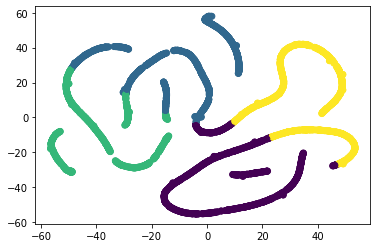

In [27]:
#4그룹으로 군집화
model1 = KMeans(n_clusters=4, random_state=0, algorithm='auto', init='k-means++')  # random_state=0 : seed 역할 (모델을 일정하게 생성 = 랜덤X)
pred1 = pd.DataFrame(model1.fit_predict(data2))
pred1.columns=['km4']

result1_4 = pd.concat([data2,pred1],axis=1)

#클러스터별 개수
pd.value_counts(result1_4['km4'].values)

#시각화
plt.scatter(x=result1_4[0], y=result1_4[1], c=result1_4['km4']) 

In [28]:
#클러스터명 사람테이블에 합치기
cluster_nm4 = result1_4[['km4']]
yz_raw = yz_people.reset_index()
yz_raw2 = yz_raw.drop(yz_raw.columns[[0]], axis='columns')
final = pd.concat([cluster_nm4, yz_raw2], axis=1)

In [29]:
#클러스터명+사람테이블
final.to_csv('cluster.csv', header=True, index=False)

군집별 비교분석
---

In [31]:
final = pd.read_csv('cluster.csv')
final['km4'].replace({0:'A', 1:'B', 2:'C', 3:'D'}, inplace=True)
final['km4'] = final['km4'].astype('category')
final['km4'].cat.reorder_categories(['A', 'B', 'C', 'D'])

#ABCD순서로 정렬
final = final.sort_values(['km4'], ascending=True)

1) 1인당 개설 계좌 수 
---

In [32]:
fig = px.box(final, x='km4', y='고객당_계좌수',color='km4',
            color_discrete_sequence = px.colors.qualitative.Set2)
fig.update_layout(
    title='1인당 개설 계좌 수',
    paper_bgcolor='white', 
    plot_bgcolor='white')
fig.show()

2) 간접투자 / 직접투자 
---

In [33]:
#이상치 제거

from sklearn.linear_model import LinearRegression
final2 = final[final['간접투자_순매수']>-1500]
final2 = final2[final2['간접투자_순매수']<300]
final2 = final2[final2['직접투자_순매수']<3000]

df = final2

x = df[['직접투자_순매수']]
y = df['간접투자_순매수']

# Condition the model on sepal width and length, predict the petal width
model = LinearRegression()
model.fit(x, y)

fig = px.scatter(
    df, x='간접투자_순매수', y='직접투자_순매수',
    marginal_x='histogram', marginal_y='histogram', color='km4', trendline='ols',
 color_discrete_sequence = px.colors.qualitative.Set2)

fig.update_traces(histnorm='probability', selector={'type':'histogram'})

fig.add_shape(
    type="line",
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)

fig.update_layout(title='간접투자 / 직접투자',
                      paper_bgcolor='white', 
                        plot_bgcolor='white')

fig.show()

3) 테마주 
---

In [34]:
gb_b5_a = final[final['거래많은_테마주']==0]
gb_b5_b = final[final['거래많은_테마주']==1]
gb_b5_c = final[final['거래많은_테마주']==2]
gb_b5_d = final[final['거래많은_테마주']==3]

fig = px.box(gb_b5_a , x="km4",  color="km4")
fig.update_layout(title=dict({'text':'테마주0(해당없음)'}),
                  xaxis=dict({'title':"집단명"}),
                  yaxis=dict({'title':"순매수"}))
fig.show()

fig = px.box(gb_b5_b , x="km4",  color="km4")
fig.update_layout(title=dict({'text':'테마주1(수익이 확실한 우량주)'}),
                  xaxis=dict({'title':"집단명"}),
                  yaxis=dict({'title':"순매수"}))
fig.show()

fig = px.box(gb_b5_c , x="km4",  color="km4")
fig.update_layout(title=dict({'text':'테마주2(위기를 큰 충격없이 넘어간 한국 경제 자체)'}),
                  xaxis=dict({'title':"집단명"}),
                  yaxis=dict({'title':"순매수"}))
fig.show()

fig = px.box(gb_b5_d , x="km4",  color="km4")
fig.update_layout(title=dict({'text':'테마주3(코로나19 국면에서 수익이 기대되는 수혜주)'}),
                  xaxis=dict({'title':"집단명"}),
                  yaxis=dict({'title':"순매수"}))
fig.show()

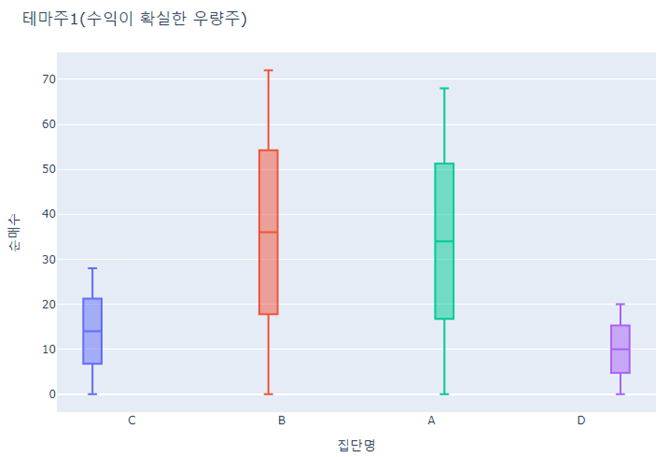

In [41]:
from IPython.display import Image

Image("테마주1.png")

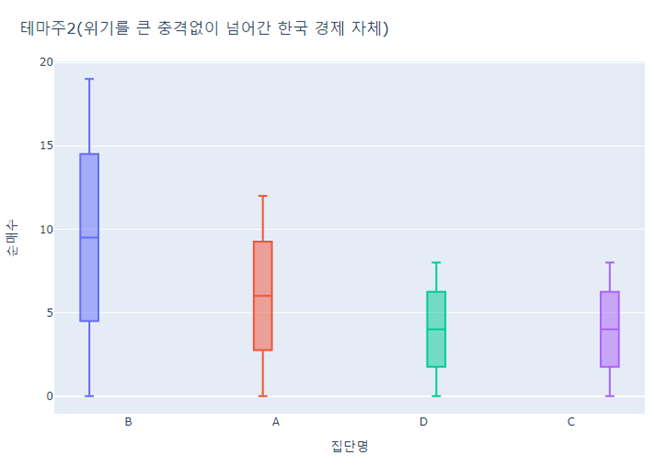

In [42]:
Image("테마주2.png")

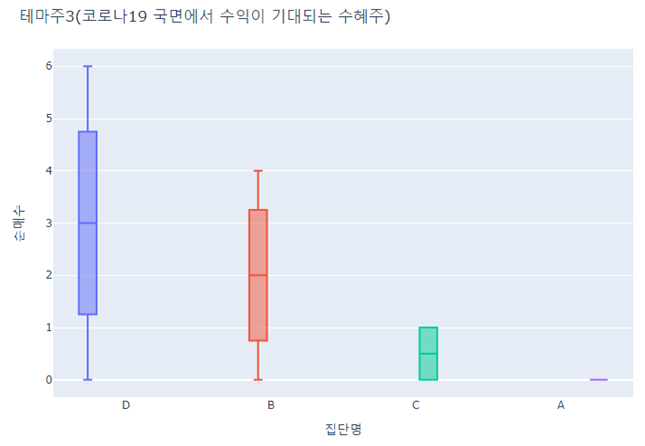

In [43]:
Image("테마주3.png")

4) 1일 회전율
---

In [35]:
fig = px.box(final.sort_values('km4'), x='km4', y='주식회전',
            color='km4', color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(
    title = '1일 회전율',
    paper_bgcolor='white', 
    plot_bgcolor='white')
fig.show()

5) 중대형주 / 소형주
---

In [36]:
smp8 = final[final['중대형주_순매수']<500]
smp8 = smp8[smp8['거래대금']<100000000000]
fig = px.scatter_3d(smp8, x='거래대금', y='중대형주_순매수', z='소형주_순매수',
              color='km4', opacity=0.7, symbol='km4',
                   color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_traces(marker=dict(size=3.5))
fig.show()

나이별 매수량

In [37]:
event2 = event[event['YZ세대여부']==1]
event3 = event2[event2['sby_dit_cd']==2]
point = event3[['cus_id','cns_qty']]

#매수량 변수 생성
#cus_id별로 체결수량 합계 구하기
point_sum = point.groupby('cus_id').sum().reset_index()

#나이변수랑 합치기
age = event3[['cus_id','cus_age']]
point_mean = age.groupby('cus_id').mean().reset_index()

point = pd.merge(point_mean, point_sum, on='cus_id')
point.columns = ['cus_id', '나이', '매수량']

#매수량 5만이상인 이상치 제거
point2 = point[point['매수량']<50000].sort_values('나이')

fig = px.box(point2, x="나이", y="매수량",color='나이', color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(
    title = '나이별 매수량',
    paper_bgcolor='white', 
    plot_bgcolor='white')
fig.show()

6) 연령대 분포
---

In [38]:
clu = final[['km4','cus_age']]
df2 = clu.groupby(by=['km4','cus_age']).size().reset_index()
df2.columns = ['km4', 'cus_age', 'size']

#시각화
clu_nm=['A', 'B', 'C', 'D']
fig = go.Figure(data=[
    go.Bar(name='20-24세', x=clu_nm, y=[93,116,84,55]),
    go.Bar(name='25-29세', x=clu_nm, y=[237,274,209,186]),
    go.Bar(name='30-34세', x=clu_nm, y=[251,229,241,236]),
    go.Bar(name='35-39세', x=clu_nm, y=[275,299,299,334])
])
fig.update_layout(barmode='group',
                 title = '연령대 분포',
                  paper_bgcolor='white',
                  plot_bgcolor='white')
fig.show()

---

**-Insight-**  
---
**[YZ세대, 같지만 너무도 다른 그들]**

**1. 이전세대와 비교한 YZ세대의 특징**



*   투자성향 : 안정 지향적
*   주문매체유형 : MTS
*   투자방식 : 간접투자
*   테마주 : 코로나19이후 모든 테마주에 고르게 투자
*   주문시간대 : 오전 9시



**2. YZ세대 내 군집별 특징 요약**



*   군집 A : 우량주에 투자

*   군집 B : 우량주와 ETF, 펀드 / 장기투자 ⭐
*   군집 C : 비교적 특징 없음



*    군집 D :  제약과 진단키트 / 단기투자 ⭐



**2-1. 군집별 persona**  



**1.**   **적금보다 주식! 내집마련을 위해 장기투자하는 사회초년생 B씨(27세)**

  군집B를 대표하는 사회초년생 B씨는, 주가 상승이 기대되는 우량주를 매수했다.   
또한 ETF와 펀드를 장기적으로 매수해 안정적인 투자성향을 보여준다.   
B씨는 산업별 전망 리포트 및 대장주의 재무제표를 찾아보며, 안정적이지만 저평가된 다음 투자처를 물색하고 있다.




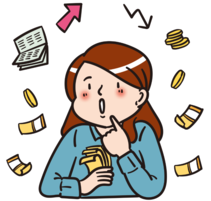

**2.   기회는 이 때! 큰 시드머니로 빠르게 치고 빠진다! 과장 D씨(37세)**  

군집D를 대표하는 OO기업 과장D씨는 노후자금을 위해 모아둔 시드머니로 주식투자를 한다.   
평소 동료들에게 정보통이라는 소리를 듣는 D씨는, 출근 직후 키워드 알림을 통해 관심있는 주식의 급등락 정보를 빠르게 파악한다.   
요즘 가장 관심가는 투자처는 코로나19 수혜주인 제약과 진단키트 회사. 매수 후 적절한 타이밍에 당일 매도하는 방법을 사용한다.


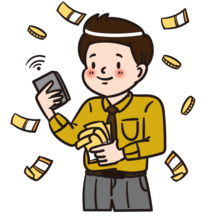

---

**-Suggestion-**  
---
**[획일적인 서비스? NO! 맞춤형 서비스? YES!]**

1. 군집 B - 장기투자 / 안정형 / 우량주, ETF, 펀드  
 
  a) 투자 성향을 반영한 Best hedge position 추천 서비스  
  b) 보유 주식의 산업군 장기 전망 리포트 서비스   
  (분기대비 성장률 지표 / 산업별 대장주 재무지표)

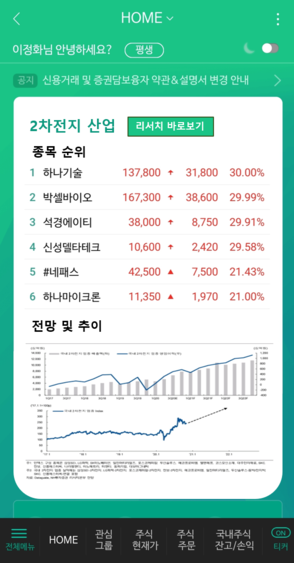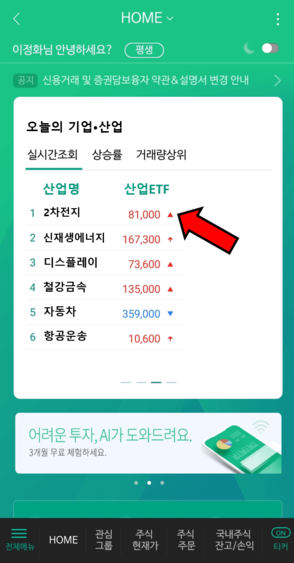

2. 군집 D - 단기투자 / 코로나19 수혜주 / 직접투자  
   
 a) 급등락 종목이 속해있는 산업 최신 뉴스 자동 알림 서비스  
 b) 시계열분석 및 뉴스분석으로 미래 예측 


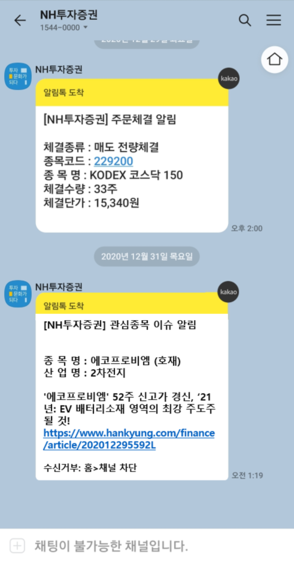